In [1]:
import pandas as pd
import math

data = pd.read_csv('Book.csv')

features = data.drop('buys computer', axis=1)
labels = data['buys computer']

print("Features :")
print(features)
print("\nLabels :")
print(labels)

print("\nCalculating prior probabilities for each class : ")
class_counts = labels.value_counts()
print("\nClass Counts - ")
print(class_counts)

total_instances = len(data)
print("\nTotal instances : ", total_instances)

priors = class_counts/total_instances
print("\nPrior probabilities :")
print(priors)

def classify(instance):
    num_features = len(instance)
    prior_positive = 1
    prior_negative = 1

    for feature_value in instance:
        feature_idx = instance.index(feature_value)
        feature_value_count = data.iloc[:, feature_idx].value_counts()[feature_value]
        positive_class_count = len(data[(data.iloc[:, feature_idx] == feature_value) & (data['buys computer'] == 'yes')])
        likelihood_positive = positive_class_count / feature_value_count
        prior_positive *= likelihood_positive

    for feature_value in instance:
        feature_idx = instance.index(feature_value)
        feature_value_count = data.iloc[:, feature_idx].value_counts()[feature_value]
        negative_class_count = len(data[(data.iloc[:, feature_idx] == feature_value) & (data['buys computer'] == 'no')])
        likelihood_negative = negative_class_count / feature_value_count
        prior_negative *= likelihood_negative

    positive_class_count = data['buys computer'].value_counts()['yes']
    negative_class_count = data['buys computer'].value_counts()['no']
    total_instances = data['buys computer'].count()
    class_prior_positive = positive_class_count / total_instances
    class_prior_negative = negative_class_count / total_instances

    posterior_positive = class_prior_positive * prior_positive
    posterior_negative = class_prior_negative * prior_negative

    return (posterior_positive, posterior_negative)
    

instance = ["youth", "high", "no", "excellent"]
prediction = classify(instance)
print(f"\nPredicted class for {instance}: yes,no : {prediction}")
if(prediction[0] > prediction[1]):
    print("Classification : Yes")
else: print("Classification : No")

Features :
    RID          age  income student credit rating
0     1        youth    high      no          fair
1     2        youth    high      no     excellent
2     3  middle aged    high      no          fair
3     4       senior  medium      no          fair
4     5       senior     low     yes          fair
5     6       senior     low     yes     excellent
6     7  middle aged     low     yes     excellent
7     8        youth  medium      no          fair
8     9        youth     low     yes          fair
9    10       senior  medium     yes          fair
10   11        youth  medium     yes     excellent
11   12  middle aged  medium      no     excellent
12   13  middle aged    high     yes          fair
13   14       senior  medium     yes     excellent

Labels :
0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
Name: buys computer, dtype: object

Calculating prior probabilities for ea

KeyError: 'youth'

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv('diabetes.csv')

# Print the dataset
print(df)

# Preprocessing
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
knn_y_pred = knn.predict(X_test_scaled)

print("KNN Results:")
print(classification_report(y_test, knn_y_pred))
print(confusion_matrix(y_test, knn_y_pred))

# SVM
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_scaled, y_train)
svm_y_pred = svm.predict(X_test_scaled)

print("\nSVM Results:")
print(classification_report(y_test, svm_y_pred))
print(confusion_matrix(y_test, svm_y_pred))

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
rf_y_pred = rf.predict(X_test_scaled)

print("\nRandom Forest Results:")
print(classification_report(y_test, rf_y_pred))
print(confusion_matrix(y_test, rf_y_pred))

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
dt_y_pred = dt.predict(X_test_scaled)

print("\nDecision Tree Results:")
print(classification_report(y_test, dt_y_pred))
print(confusion_matrix(y_test, dt_y_pred))

# Logistic Regression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)
logreg_y_pred = logreg.predict(X_test_scaled)

print("\nLogistic Regression Results:")
print(classification_report(y_test, logreg_y_pred))
print(confusion_matrix(y_test, logreg_y_pred))

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              5      109             75             26        0  36.0   
1              3      158             76             36      245  31.6   
2              3       88             58             11       54  24.8   
3              6       92             92              0        0  19.9   
4             10      122             78             31        0  27.6   
..           ...      ...            ...            ...      ...   ...   
733           10      101             76             48      180  32.9   
734            2      122             70             27        0  36.8   
735            5      121             72             23      112  26.2   
736            1      126             60              0        0  30.1   
737            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.546   60        0  
1                  

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import mlxtend
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

ModuleNotFoundError: No module named 'mlxtend'

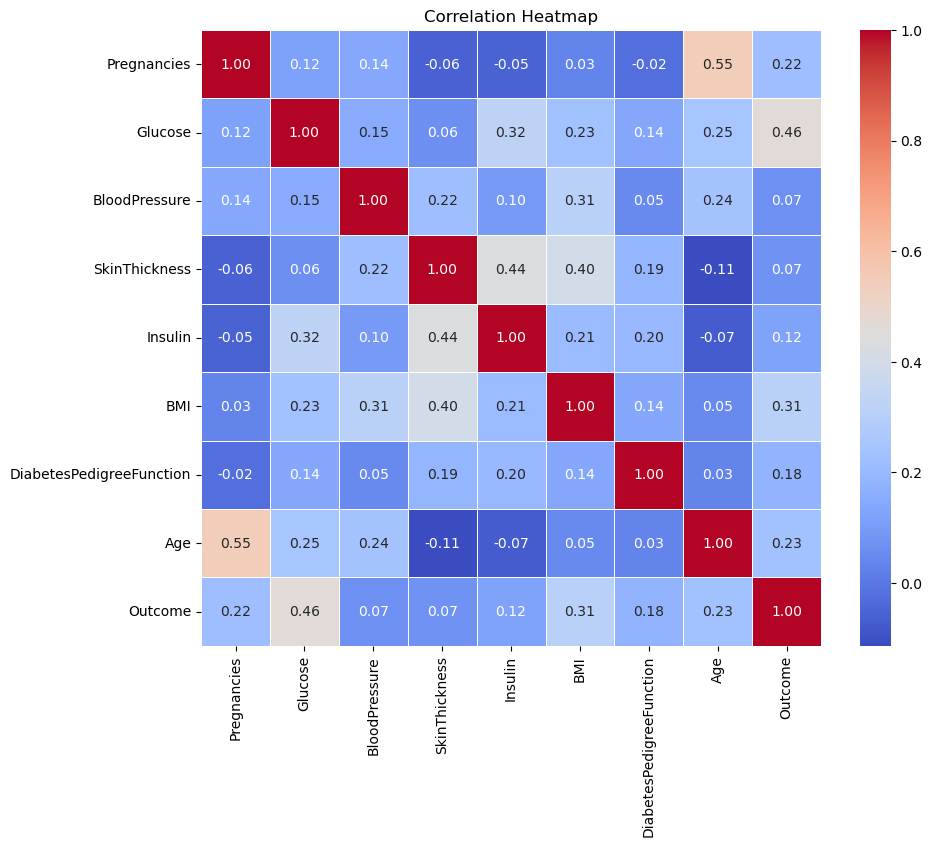

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pan

# Load data
data = pd.read_csv("DIABETES.csv")

# Calculate correlation matrix
corr_matrix = data.corr()

# Generate heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [3]:
import pandas as pd
import math

data = pd.read_csv('bayes_data.csv')

features = data.drop('buys computer', axis=1)
labels = data['buys computer']

print("Features :")
print(features)
print("\nLabels :")
print(labels)

print("\nCalculating prior probabilities for each class : ")
class_counts = labels.value_counts()
print("\nClass Counts - ")
print(class_counts)

total_instances = len(data)
print("\nTotal instances : ", total_instances)

priors = class_counts/total_instances
print("\nPrior probabilities :")
print(priors)

def classify(instance):
    num_features = len(instance)
    prior_positive = 1
    prior_negative = 1

    for feature_value in instance:
        feature_idx = instance.index(feature_value)
        feature_value_count = data.iloc[:, feature_idx].value_counts()[feature_value]
        positive_class_count = len(data[(data.iloc[:, feature_idx] == feature_value) & (data['buys computer'] == 'yes')])
        likelihood_positive = positive_class_count / feature_value_count
        prior_positive *= likelihood_positive

    for feature_value in instance:
        feature_idx = instance.index(feature_value)
        feature_value_count = data.iloc[:, feature_idx].value_counts()[feature_value]
        negative_class_count = len(data[(data.iloc[:, feature_idx] == feature_value) & (data['buys computer'] == 'no')])
        likelihood_negative = negative_class_count / feature_value_count
        prior_negative *= likelihood_negative

    positive_class_count = data['buys computer'].value_counts()['yes']
    negative_class_count = data['buys computer'].value_counts()['no']
    total_instances = data['buys computer'].count()
    class_prior_positive = positive_class_count / total_instances
    class_prior_negative = negative_class_count / total_instances

    posterior_positive = class_prior_positive * prior_positive
    posterior_negative = class_prior_negative * prior_negative

    return (posterior_positive, posterior_negative)
    

instance = ["youth", "high", "no", "excellent"]
prediction = classify(instance)
print(f"\nPredicted class for {instance}: yes,no : {prediction}")
if(prediction[0] > prediction[1]):
    print("Classification : Yes")
else: print("Classification : No")

FileNotFoundError: [Errno 2] No such file or directory: 'bayes_data.csv'

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Step 1: Load the data
data = pd.read_csv("DIABETES.csv")

# Step 2: Split the data into features (X) and target variable (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 4: Standardize the features (not necessary for Decision Trees and Random Forests, but useful for others)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Train different classifiers and evaluate their performance
classifiers = {
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),  # Set probability=True for AUC calculation
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression()
}

for name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    y_pred_proba = clf.predict_proba(X_test_scaled)[:, 1]  # Probability of positive class for AUC calculation
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    
    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")
    print("="*50)

Classifier: KNN
Accuracy: 0.6973
Precision: 0.4688
Recall: 0.5769
F1-score: 0.5172
AUC: 0.7224
Classifier: SVM
Accuracy: 0.7081
Precision: 0.4844
Recall: 0.5962
F1-score: 0.5345
AUC: 0.7606
Classifier: Random Forest
Accuracy: 0.7081
Precision: 0.4844
Recall: 0.5962
F1-score: 0.5345
AUC: 0.7373
Classifier: Decision Tree
Accuracy: 0.6865
Precision: 0.4559
Recall: 0.5962
F1-score: 0.5167
AUC: 0.6590
Classifier: Logistic Regression
Accuracy: 0.7351
Precision: 0.5263
Recall: 0.5769
F1-score: 0.5505
AUC: 0.7610


In [6]:
import time
import numpy as np
import matplotlib.pyplot as plt
import os

In [12]:
def load_data(dir_name):
    """
    Function for loading MNIST data stored in comma delimited files. Labels for 
    each image are the first entry in each row.

    Parameters
    ----------
    dit_name : str
         Path to where data is contained

    Returns
    -------
    X : array_like
        A (N x p=784) matrix of samples 
    Y : array_like
        A (N x 1) matrix of labels for each sample
    """
    data = list() # init a list called `data`
    
    with open(dir_name,"r") as f: # open the directory as a read ("r"), call it `f`
        for line in f: # iterate through each `line` in `f`
            split_line = np.array(line.split(',')) # split lines by `,` - cast the resultant list into an numpy array
            split_line = split_line.astype(np.float32) # make the numpy array of str into floats
            data.append(split_line) # collect the sample into the `data` list
            
    data = np.asarray(data) # convert the `data` list into a numpy array for easier indexing
    
    # as the first number in each sample is the label (0-9), extract that from the rest and return both (X,Y)
    return data[:,1:],data[:,0]

In [1]:
class AirportSelfCheckInMachine:
    def _init_(self):
        self.boarding_pass_template = """
        -----------------------------------
        | Boarding Pass                    |
        -----------------------------------
        | Flight Number: {flight_number}   |
        | Passenger Name: {passenger_name} |
        | Seat Number: {seat_number}       |
        -----------------------------------
        """
        self.bag_tag_template = """
        -----------------------------------
        | Bag Tag                          |
        -----------------------------------
        | Flight Number: {flight_number}   |
        | Passenger Name: {passenger_name} |
        | Bag ID: {bag_id}                 |
        -----------------------------------
        """
        self.flight_database = {
            "ABC123": {"flight_number": "ABC123", "destination": "New York", "departure_time": "12:00 PM", "seat_map": ["A1", "A2", "A3", "A4"]},
            # Add more flights as needed
        }
        self.bag_id_counter = 1

    def start(self):
        print("Welcome to the Airport Self Check-In Machine!")
        self.activate_kiosk()

    def activate_kiosk(self):
        start_activation = input("Press START/ACTIVATE KIOSK to begin: ").strip().upper()
        if start_activation == "START" or start_activation == "ACTIVATE KIOSK":
            self.check_flight_confirmation()
        else:
            print("Invalid input. Please try again.")
            self.activate_kiosk()

    def check_flight_confirmation(self):
        flight_confirmation_number = input("Please input your flight confirmation number: ").strip().upper()
        if flight_confirmation_number in self.flight_database:
            print("Flight confirmation number verified.")
            self.confirmation()
        else:
            print("Invalid flight confirmation number. Please try again.")
            self.check_flight_confirmation()

    def confirmation(self):
        finished_confirmation = input("Are you finished? (yes/no): ").strip().lower()
        if finished_confirmation == "yes":
            self.check_bags()
        elif finished_confirmation == "no":
            self.start()
        else:
            print("Invalid input. Please enter 'yes' or 'no'.")
            self.confirmation()

    def check_bags(self):
        check_bags_input = input("Would you like to check bags? (yes/no): ").strip().lower()
        if check_bags_input == "yes":
            bag_id = self.generate_bag_id()
            print("Bags checked.")
            self.print_bag_tag(bag_id)
            self.print_boarding_pass()
            print("Thank you for using the Self Check-In Machine. Have a great flight!")
        elif check_bags_input == "no":
            self.print_boarding_pass()
            print("Thank you for using the Self Check-In Machine. Have a great flight!")
        else:
            print("Invalid input. Please enter 'yes' or 'no'.")
            self.check_bags()

    def generate_bag_id(self):
        bag_id = f"Bag{self.bag_id_counter}"
        self.bag_id_counter += 1
        return bag_id

    def print_bag_tag(self, bag_id):
        flight_info = self.flight_database["ABC123"]  # Assuming only one flight for simplicity
        passenger_name = input("Please enter your name: ").strip().title()
        print(self.bag_tag_template.format(flight_number=flight_info["flight_number"], passenger_name=passenger_name, bag_id=bag_id))

    def print_boarding_pass(self):
        flight_info = self.flight_database["ABC123"]  # Assuming only one flight for simplicity
        passenger_name = input("Please enter your name: ").strip().title()
        available_seats = flight_info["seat_map"]
        seat_number = self.select_seat(available_seats)
        print(self.boarding_pass_template.format(flight_number=flight_info["flight_number"], passenger_name=passenger_name, seat_number=seat_number))

    def select_seat(self, available_seats):
        print("Available seats:", available_seats)
        chosen_seat = input("Select your seat number from the available options: ").strip().upper()
        if chosen_seat in available_seats:
            return chosen_seat
        else:
            print("Invalid seat selection. Please choose from the available seats.")
            return self.select_seat(available_seats)


# Usage
self_check_in_machine = AirportSelfCheckInMachine()
self_check_in_machine.start()

Welcome to the Airport Self Check-In Machine!
Press START/ACTIVATE KIOSK to begin: START
Please input your flight confirmation number: ABC!@#


AttributeError: 'AirportSelfCheckInMachine' object has no attribute 'flight_database'